### General Overview of DataFrame

In [2]:
import numpy as np
import pandas as pd
import os
print(os.listdir('../separated_jobs'))

['.ipynb_checkpoints', '3d_specialist.csv', 'academic_professor.csv', 'ai_engineer.csv', 'analyst_roles.csv', 'app_developer.csv', 'artificial_intelligence_researcher.csv', 'automation_engineer.csv', 'backend-developer.csv', 'blockchain_developer.csv', 'business_analyst.csv', 'c#_developer.csv', 'c++_developer.csv', 'cloud_engineer.csv', 'content_writer.csv', 'cybersecurity_specialist.csv', 'data_analyst.csv', 'data_base_administrator.csv', 'data_scientist.csv', 'developer_roles.csv', 'devops_engineer.csv', 'digital_marketing_specialist.csv', 'electronics_engineer.csv', 'firmware_engineer.csv', 'freelancer.csv', 'front-end_developer.csv', 'full-stack_developer.csv', 'game_developer.csv', 'graphics_designer.csv', 'hardware_engineer.csv', 'integration_engineer.csv', 'it_specialist.csv', 'java_developer.csv', 'lead_engineer.csv', 'machine_learning_engineer.csv', 'manager_roles.csv', 'mechanical_engineer.csv', 'network_engineer.csv', 'other.csv', 'product_manager.csv', 'python_developer.cs

In [3]:
df_site = pd.read_csv('../separated_jobs/site-reliability_engineer.csv')

In [4]:
display(df_site.head())

,company_name,job_role,job_location,salary_pa,skills,company_rating,standardized_job_role
0,Polygon,Site Reliability Engineer,Remote,0.0,"Software troubleshooting, Ansible, Software de...",3.3,Site-Reliability Engineer
1,NetApp,"Site Reliability Engineer (Python, Golang, Ter...",Bengaluru,1608000.0,"Jira, Elasticsearch, Cloud infrastructure, Go,...",4.1,Site-Reliability Engineer
2,NetApp,Site Reliability Engineer,Bengaluru,1608000.0,"Computer science, Elasticsearch, Azure, Operat...",4.1,Site-Reliability Engineer
3,Alkira,Software Engineer - SRE (India),Remote,0.0,"CI/CD, Cloud infrastructure, Azure, Kubernetes...",4.2,Site-Reliability Engineer
4,Calibery Software LLC,Site Reliability Engineer,Remote,936000.0,"Cloud infrastructure, Azure, Load balancing, o...",3.0,Site-Reliability Engineer


### Handling NaN Values

In [6]:
display(df_site.isnull().sum())

company_name              0
job_role                  0
job_location              0
salary_pa                 0
skills                    3
company_rating           21
standardized_job_role     0
dtype: int64

In [7]:
display(df_site[df_site['salary_pa'] == 0])

,company_name,job_role,job_location,salary_pa,skills,company_rating,standardized_job_role
0,Polygon,Site Reliability Engineer,Remote,0.0,"Software troubleshooting, Ansible, Software de...",3.3,Site-Reliability Engineer
3,Alkira,Software Engineer - SRE (India),Remote,0.0,"CI/CD, Cloud infrastructure, Azure, Kubernetes...",4.2,Site-Reliability Engineer
5,Microsoft,Site Reliability Engineer,Hyderābād,0.0,"Microsoft Windows Server, CI/CD, Azure, DevOps...",4.2,Site-Reliability Engineer
6,InOrg Global,Site Reliability Engineer (SRE),Remote,0.0,"Elasticsearch, Azure, Operating systems, Kuber...",NaN,Site-Reliability Engineer
7,Masabi,Site Reliability Engineer (remote),Maharashtra,0.0,"CI/CD, Cloud infrastructure, PCI, Git, AWS",4.5,Site-Reliability Engineer
...,...,...,...,...,...,...,...
284,Kinaxis Inc.,"Manager, Site Reliability Engineering",India,0.0,"CI/CD, Cloud infrastructure, Azure, Ansible, C...",4.0,Site-Reliability Engineer
293,Lemongrass Consulting,Senior Infrastructure / Site Reliability Engineer,India,0.0,"CI/CD, Cloud infrastructure, System administra...",4.1,Site-Reliability Engineer
307,McCain Foods Limited,SRE Engineer,Delhi,0.0,"CI/CD, Azure, Salt, Kubernetes, Ansible",3.9,Site-Reliability Engineer
318,Entain plc,SRE Manager,India,0.0,"Jira, CI/CD, Oracle, Ansible, Encryption",3.5,Site-Reliability Engineer


In [8]:
df_site['salary_pa'] = df_site['salary_pa'].astype(float) / 100000
df_site.rename(columns = {'salary_pa':'salary_lpa'}, inplace = True)

In [9]:
df_site['company_rating'] = df_site['company_rating'].fillna(0)

In [10]:
avg_salary_by_rating = df_site[df_site['salary_lpa'] > 0].groupby('company_rating')['salary_lpa'].mean()

In [11]:
def map_with_nearest_rating(row, avg_salary_by_rating):
    if row['salary_lpa'] == 0 or pd.isna(row['salary_lpa']):  
        rating = row['company_rating']
        if rating in avg_salary_by_rating:  
            return avg_salary_by_rating[rating]
        else:  
            nearest_rating = min(avg_salary_by_rating.keys(), key=lambda x: abs(x - rating))
            return avg_salary_by_rating[nearest_rating]
    return row['salary_lpa']  

df_site['salary_lpa'] = df_site.apply(
    lambda row: map_with_nearest_rating(row, avg_salary_by_rating), axis=1
)

### Salary Distribution on the basis of skills

In [13]:

df_site['skills'] = df_site['skills'].str.split(',\s*')


df_skills = df_site.explode('skills')
df_skills = df_skills.drop_duplicates().reset_index(drop = True)


In [14]:
display(df_skills)

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
0,Polygon,Site Reliability Engineer,Remote,7.0,Software troubleshooting,3.3,Site-Reliability Engineer
1,Polygon,Site Reliability Engineer,Remote,7.0,Ansible,3.3,Site-Reliability Engineer
2,Polygon,Site Reliability Engineer,Remote,7.0,Software deployment,3.3,Site-Reliability Engineer
3,Polygon,Site Reliability Engineer,Remote,7.0,Load balancing,3.3,Site-Reliability Engineer
4,Polygon,Site Reliability Engineer,Remote,7.0,DevOps,3.3,Site-Reliability Engineer
...,...,...,...,...,...,...,...
1582,AT&T,Sr Specialist App/Prod Support-- SITE RELIABIL...,Hyderābād,7.0,CI/CD,3.4,Site-Reliability Engineer
1583,AT&T,Sr Specialist App/Prod Support-- SITE RELIABIL...,Hyderābād,7.0,Salesforce Marketing Cloud,3.4,Site-Reliability Engineer
1584,AT&T,Sr Specialist App/Prod Support-- SITE RELIABIL...,Hyderābād,7.0,Azure,3.4,Site-Reliability Engineer
1585,AT&T,Sr Specialist App/Prod Support-- SITE RELIABIL...,Hyderābād,7.0,Kubernetes,3.4,Site-Reliability Engineer


In [15]:
import seaborn as sns

skill_counts = df_skills['skills'].value_counts()


top_skills = skill_counts.head(10).index




df_top_skills = df_skills[df_skills['skills'].isin(top_skills)]

C:\Users\rhyth\AppData\Local\Temp\ipykernel_15552\3667392867.py:6: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True
C:\Users\rhyth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rhyth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


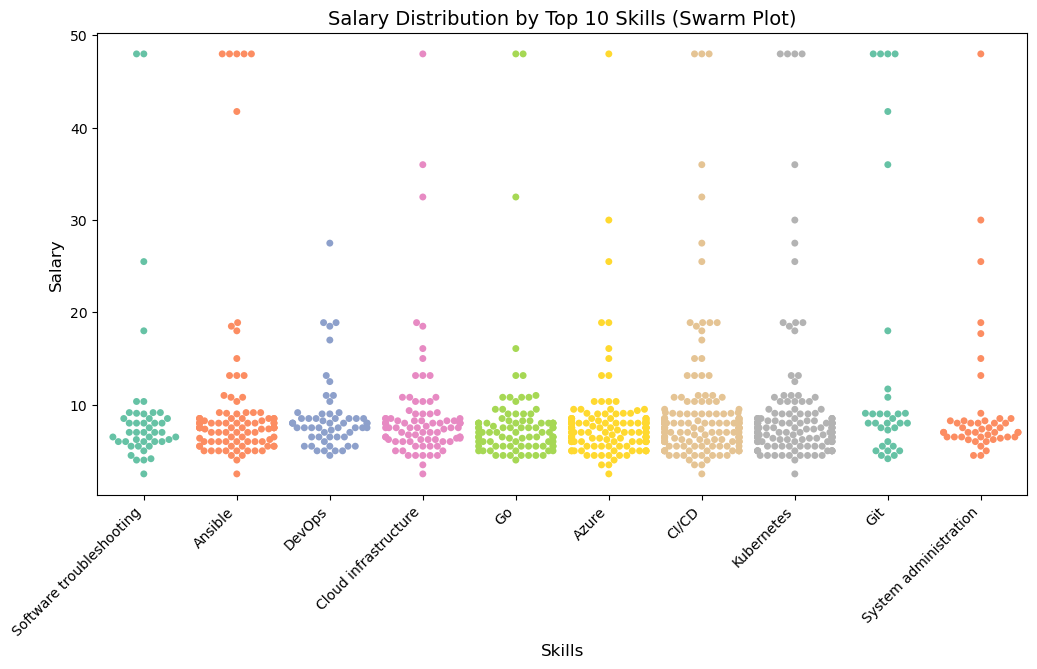

In [16]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt

warnings.simplefilter(action='ignore', category=UserWarning)
pd.options.mode.use_inf_as_na = True
plt.figure(figsize=(12, 6))
# sns.swarmplot(x='skills', y='salary_pa', data=df_top_skills, palette="Set2")
sns.swarmplot(x='skills', y='salary_lpa', data=df_top_skills,palette="Set2",hue="skills",legend=False)

plt.title("Salary Distribution by Top 10 Skills (Swarm Plot)", fontsize=14)
plt.xlabel("Skills", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

### Most Demanding Skills in the Market

In [18]:

all_skills = [skill for sublist in df_site['skills'].dropna() for skill in sublist]
df_site.head()

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
0,Polygon,Site Reliability Engineer,Remote,7.000000,"[Software troubleshooting, Ansible, Software d...",3.3,Site-Reliability Engineer
1,NetApp,"Site Reliability Engineer (Python, Golang, Ter...",Bengaluru,16.080000,"[Jira, Elasticsearch, Cloud infrastructure, Go...",4.1,Site-Reliability Engineer
2,NetApp,Site Reliability Engineer,Bengaluru,16.080000,"[Computer science, Elasticsearch, Azure, Opera...",4.1,Site-Reliability Engineer
3,Alkira,Software Engineer - SRE (India),Remote,10.346154,"[CI/CD, Cloud infrastructure, Azure, Kubernete...",4.2,Site-Reliability Engineer
4,Calibery Software LLC,Site Reliability Engineer,Remote,9.360000,"[Cloud infrastructure, Azure, Load balancing, ...",3.0,Site-Reliability Engineer


In [19]:
from collections import Counter


skill_counts = Counter(all_skills)


skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count'])


skill_df = skill_df.sort_values(by='Count', ascending=False)
print(skill_df)


                          Skill  Count
14                        CI/CD    159
15                   Kubernetes    155
11                        Azure    138
1                       Ansible     95
8                            Go     90
..                          ...    ...
107                        Perl      1
106                        SAFe      1
103            Machine learning      1
102           Incident response      1
169  Salesforce Marketing Cloud      1

[170 rows x 2 columns]


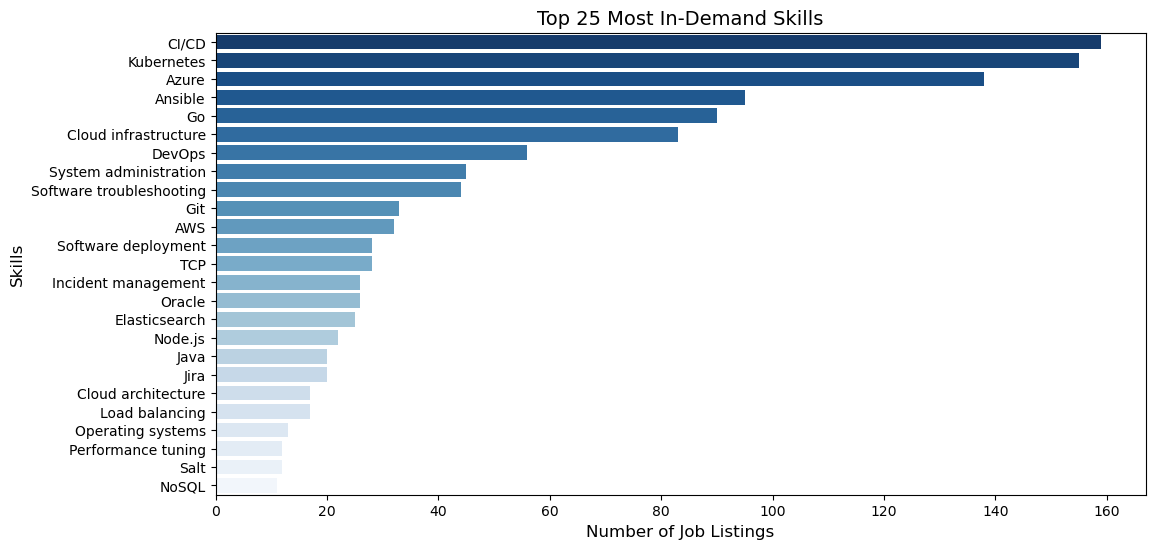

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt


top_skills = skill_df.head(25)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills['Count'], y=top_skills['Skill'], palette="Blues_r")

plt.title("Top 25 Most In-Demand Skills", fontsize=14)
plt.xlabel("Number of Job Listings", fontsize=12)
plt.ylabel("Skills", fontsize=12)
plt.show()

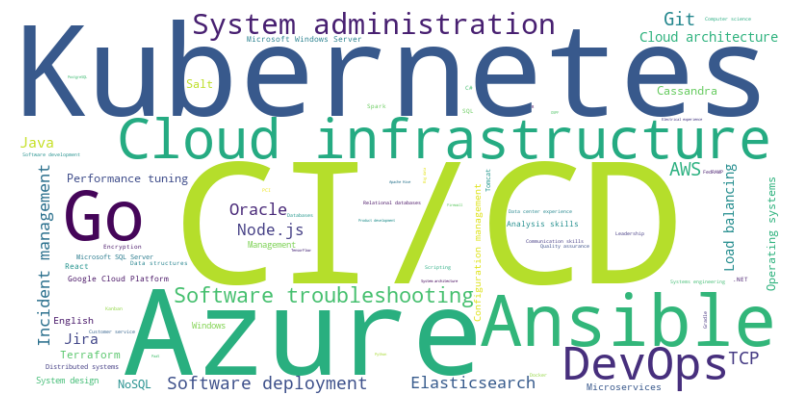

In [21]:

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(skill_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### High Paying Companies

In [23]:
top_companies = df_site.groupby('company_name')['salary_lpa'].mean().reset_index()


top_companies = top_companies.sort_values(by='salary_lpa', ascending=False)


print(top_companies.head(10))

                        company_name  salary_lpa
111                          Kyndryl   48.000000
58                          DBS Bank   48.000000
61                            Deqode   48.000000
183                     State Street   41.760000
142                          PhonePe   39.229000
107                    JPMorganChase   37.500000
177                           Sezzle   32.500000
226  client in excellent opportunity   27.500000
27             Bahwan Cybertek Group   25.500000
122                        Microsoft   19.211538


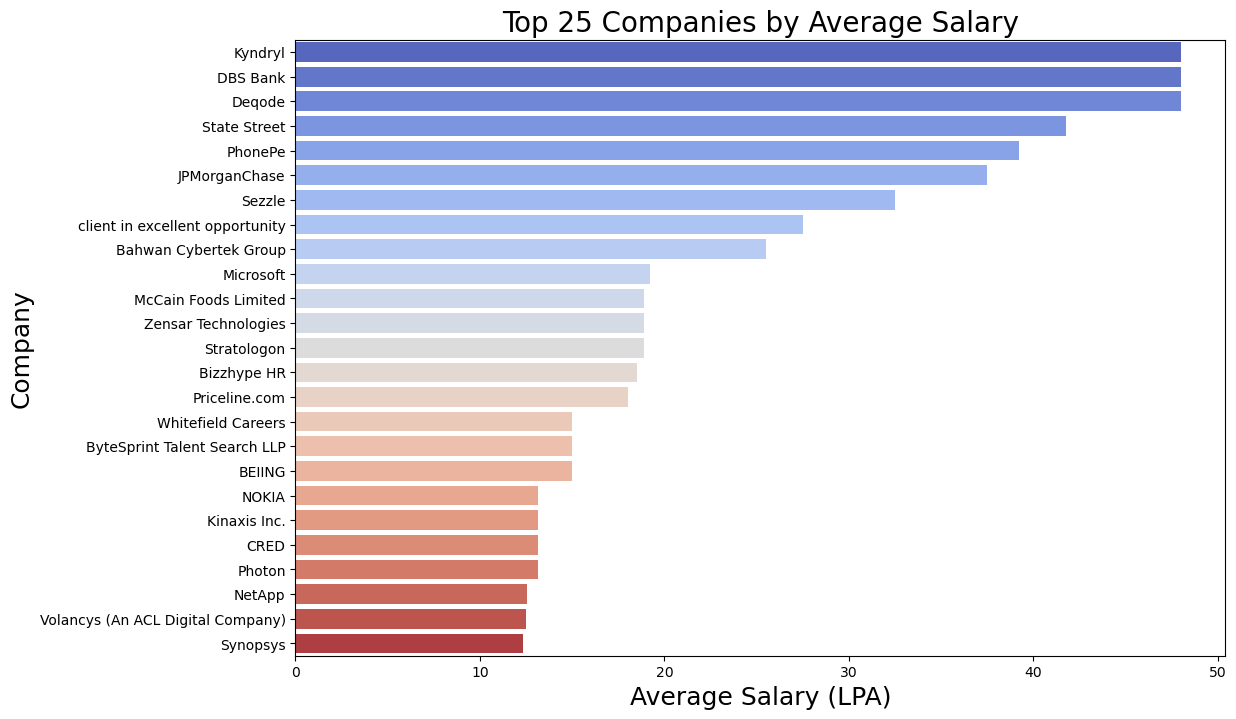

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt


top_10 = top_companies.head(25)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10['salary_lpa'], y=top_10['company_name'], palette="coolwarm")

plt.title("Top 25 Companies by Average Salary", fontsize=20)
plt.xlabel("Average Salary (LPA)", fontsize=18)
plt.ylabel("Company", fontsize=18)
plt.show()


### Total Salary VS Location

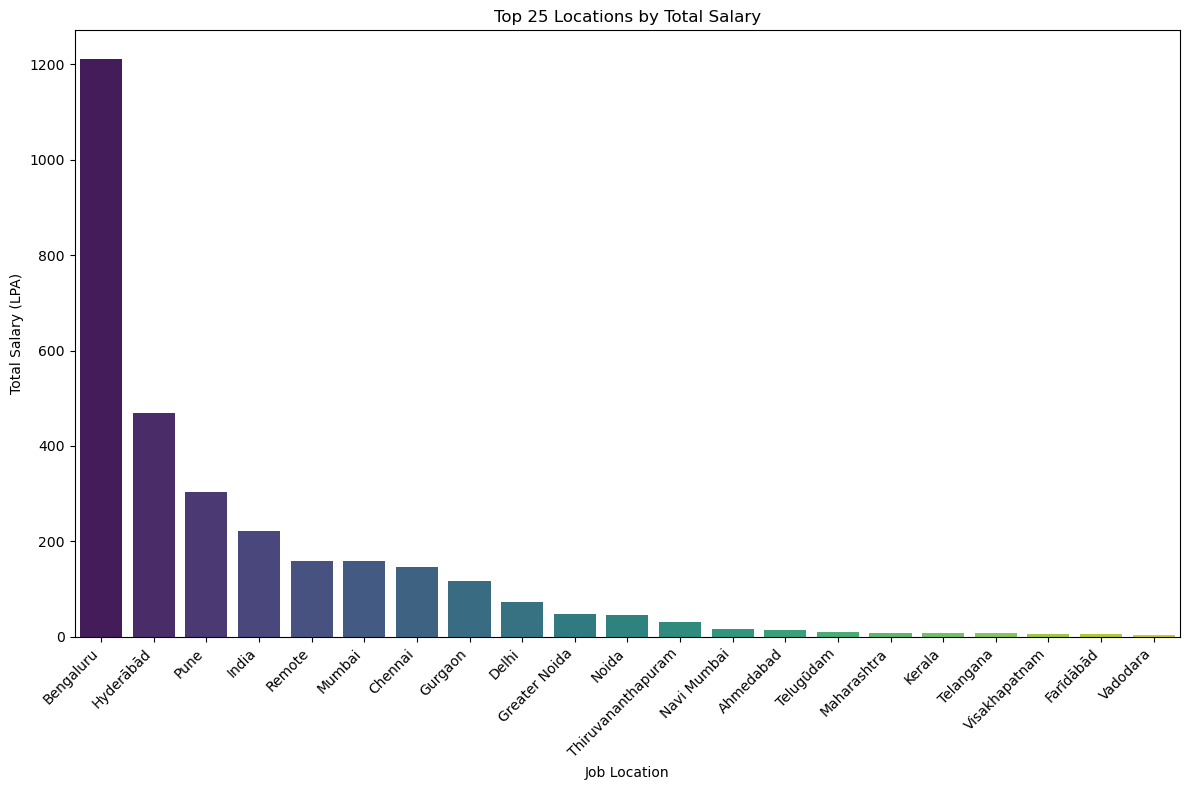

In [26]:
salary_by_location = df_site.groupby('job_location')['salary_lpa'].sum()


top_locations = salary_by_location.sort_values(ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')


plt.xlabel('Job Location')
plt.ylabel('Total Salary (LPA)')
plt.title('Top 25 Locations by Total Salary')


plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

### Number of jobs VS Location

In [28]:
job_count_by_location = df_site['job_location'].value_counts()


top_locations = job_count_by_location.head(25)

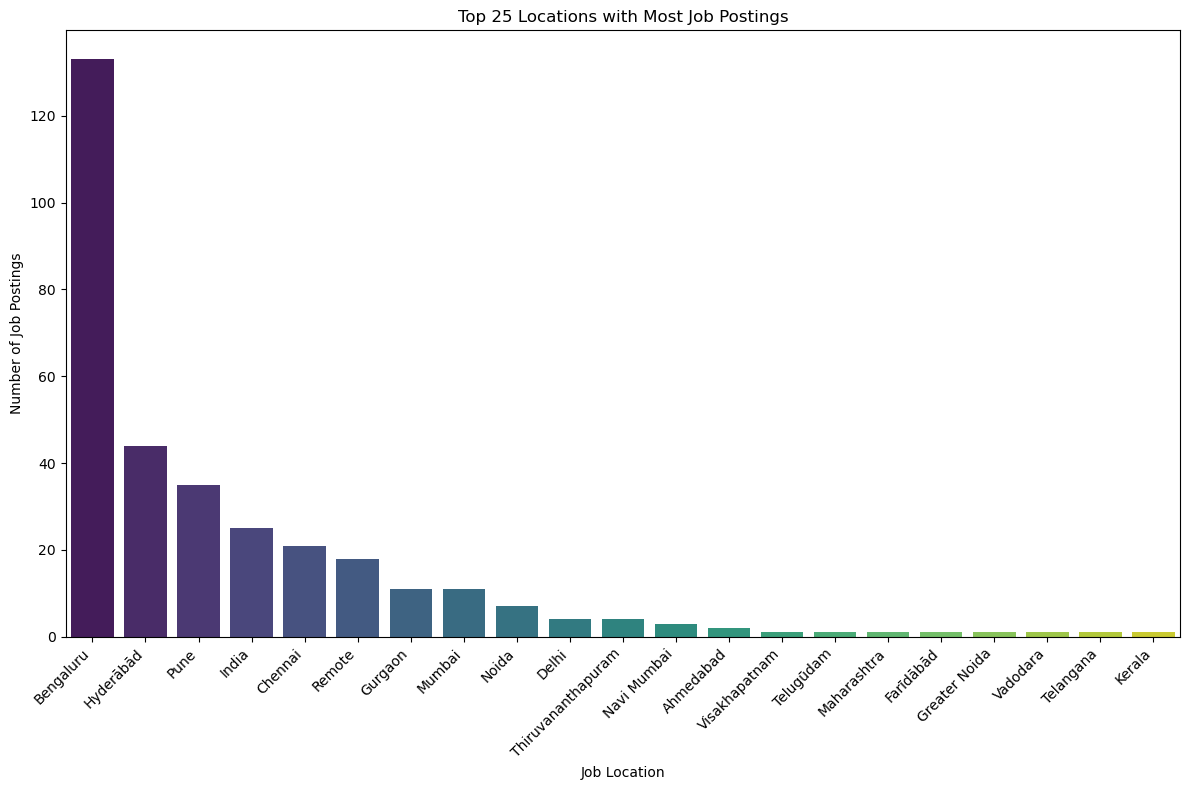

In [29]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')


plt.xlabel('Job Location')
plt.ylabel('Number of Job Postings')
plt.title('Top 25 Locations with Most Job Postings')


plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

### Highest Paying Job Roles

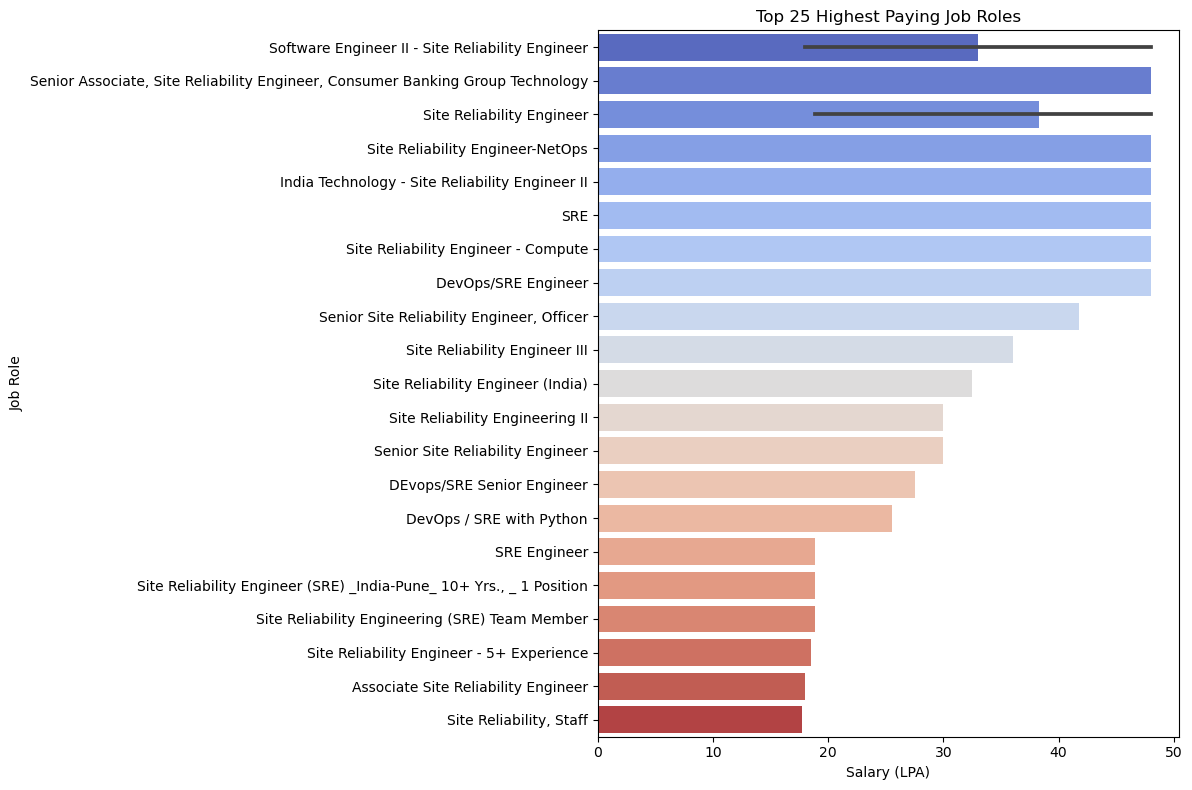

In [31]:
top_roles_by_salary = df_site[['job_role', 'salary_lpa']].sort_values(by='salary_lpa', ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x='salary_lpa', y='job_role', data=top_roles_by_salary, palette='coolwarm')


plt.xlabel('Salary (LPA)')
plt.ylabel('Job Role')
plt.title('Top 25 Highest Paying Job Roles')


plt.tight_layout()
plt.show()

### Salary Distribution Curves

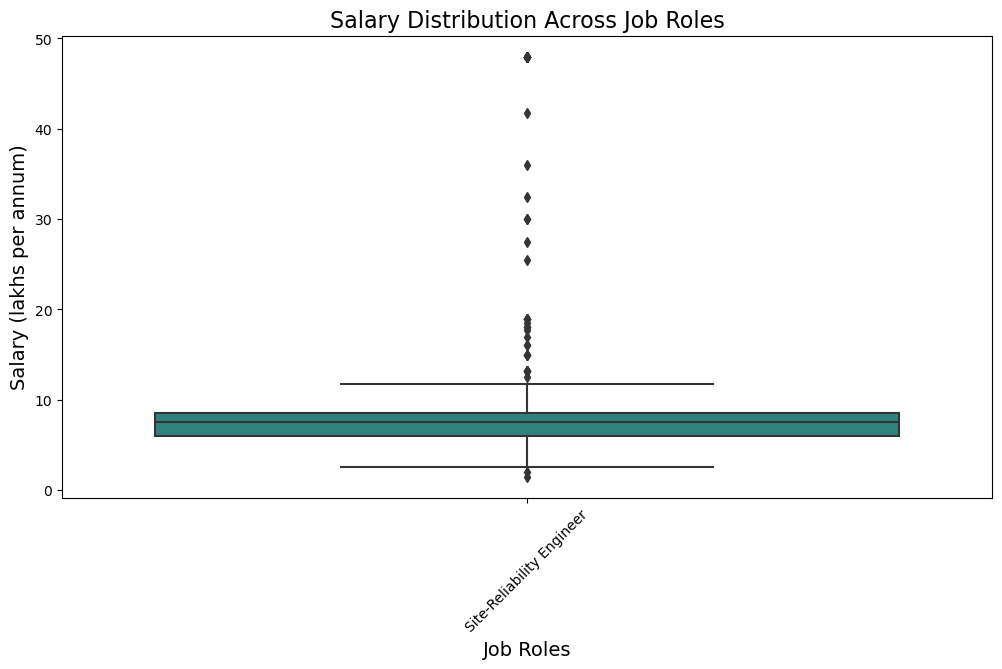

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns


df_site_clean = df_site[df_site['salary_lpa'] > 0]


plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_site_clean,
    x='standardized_job_role',
    y='salary_lpa',
    palette='viridis'
)
plt.title('Salary Distribution Across Job Roles', fontsize=16)
plt.xlabel('Job Roles', fontsize=14)
plt.ylabel('Salary (lakhs per annum)', fontsize=14)
plt.xticks(rotation=45)
plt.show()


C:\Users\rhyth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


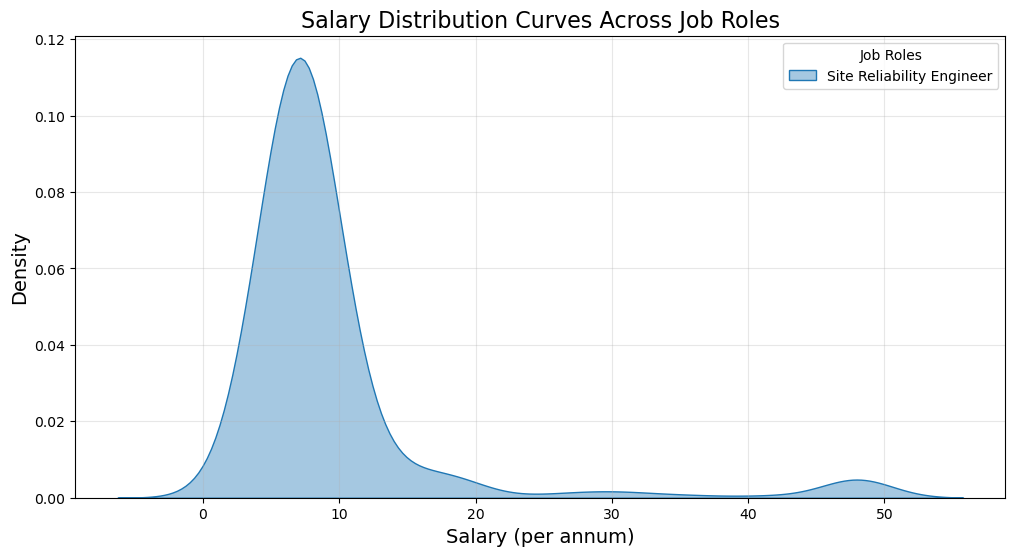

In [34]:

df_blockchain_clean = df_site[df_site['salary_lpa'] > 0]


plt.figure(figsize=(12, 6))



sns.kdeplot(
    data=df_blockchain_clean,
    x='salary_lpa',
    label='Site Reliability Engineer',
    fill=True,  
    alpha=0.4  
)


plt.title('Salary Distribution Curves Across Job Roles', fontsize=16)
plt.xlabel('Salary (per annum)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title="Job Roles", fontsize=10)
plt.grid(alpha=0.3)
plt.show()


### Company Rating VS Average Salary

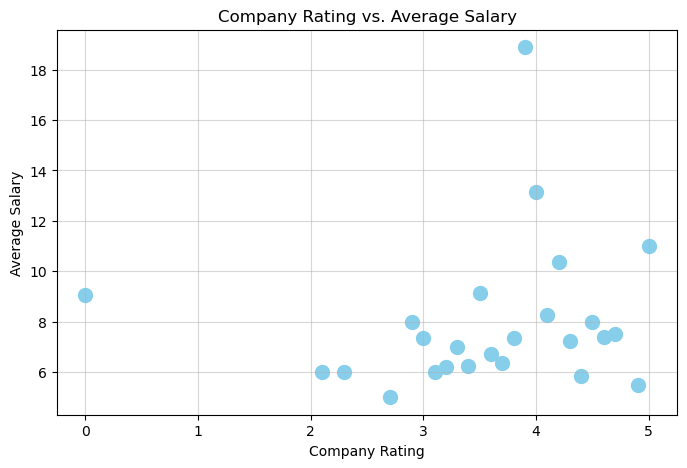

In [36]:
rating_avg_salary = df_site.groupby('company_rating')['salary_lpa'].mean()
# Step 1a: Map the. average salary to a diction
plt.figure(figsize=(8, 5))
plt.scatter(rating_avg_salary.index, rating_avg_salary.values, color='skyblue', s=100)
plt.title('Company Rating vs. Average Salary')
plt.xlabel('Company Rating')
plt.ylabel('Average Salary')
plt.grid(alpha=0.5)
plt.show()

### Remote VS On-site

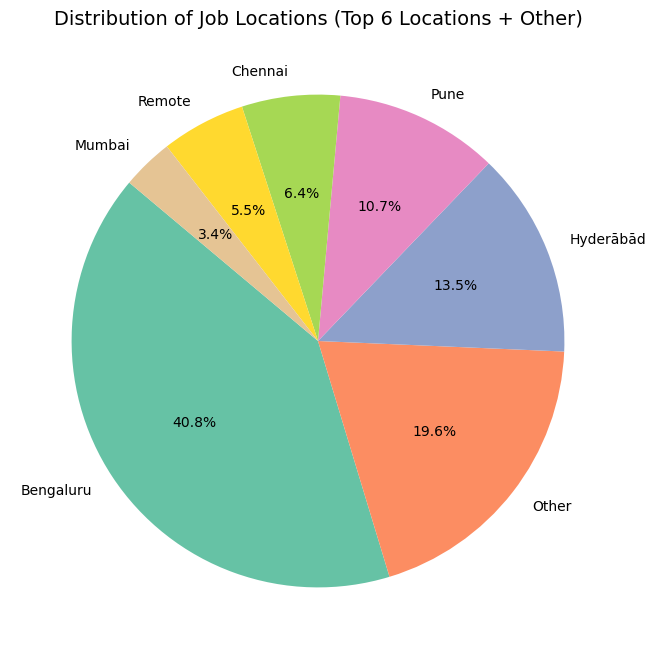

In [41]:

location_counts = df_site[df_site['job_location'] != 'India']['job_location'].value_counts()


top_locations = location_counts.head(6).index


df_site['job_location_grouped'] = df_site['job_location'].apply(lambda x: x if x in top_locations else 'Other')


location_grouped_counts = df_site['job_location_grouped'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(location_grouped_counts, labels=location_grouped_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2", len(location_grouped_counts)))


plt.title("Distribution of Job Locations (Top 6 Locations + Other)", fontsize=14)


plt.show()